# Latent Semantic Analysis

## Archeology of computational linguistics

- 1990s–2000s: Statistical learning
  - algorithms, evaluation, corpora
- 1980s: Standard resources and tasks
  - Penn Treebank, WordNet, MUC
- 1970s: Kernel (vector) spaces
  - clustering, information retrieval (IR)
- 1960s: Representation Transformation
  - Finite state machines (FSM) and Augmented transition networks (ATNs)  
- 1960s: Representation−beyond the word level
   - lexical features, tree structures, networks

### PageRank Algorithm (Google)

- Google the word ‘weather forecast’ $\to$  Answer: 4.2 million pages.
-  How does Google know which pages are the most important?
-  Google assigns a number to each individual page (PageRank number) computed via the eigenvalue problem

   $$Pw=\lambda w$$
- Current size of P: $4.2\times10^9$

### Latent semantic analysis & topic models

The LSA approach makes three claims:

1. semantic information can be derived from a word-document co-occurrence matrix
2. dimensionality reduction is an essential part of this derivation
3. words and documents can be represented as points in Euclidean space

## Latent Semantic Analysis

<img src="https://www.evernote.com/l/AAH9N9DZcTdKC4ccjzhkEhDdK1B2XXkHAy8B/image.png" width="500px">
![](http://interactive.blockdiag.com/image?compression=deflate&encoding=base64&src=eJxLyslPzk7JTExXqOZSUFAqSixXSEksSVRS0LVTUCpILCpOhTCTc1IT85SsQWogTLBoSGpRrq5LfnJpbmpeiUJMnm9iSVFmBUQZDjmwvuAwFwjDM68ktaigKBWkICi1uDSnpBiouxYAYKwuOg)

### Term-Document Matrix
![](https://www.evernote.com/l/AAGGUjmVABRI0bxJWuk0s_RwCD0Hc-oaleYB/image.png)

### TFIDF

$$\text{Term Frequency}\cdot\text{Inverse Document Frequency}$$

$$\text{Term Frequency} = \text{# times a word appears in a document}$$

$$\text{Inverse Document Frequency} = (\text{# documents that contain word})^{-1}$$

### Singular Value Decomposition

- Factors matrix into the product of three matrices

  $$X = USV^T$$
  
- $m$ is the number of documents
- $n$ is the number of terms
- $U$ is $m\times n$
- $S$ is $n\times n$
- $V$ is $n\times n$

### Low-Rank Approximation Singular Value Decomposition

- Factors matrix into the product of three matrices

  $$X = U_kS_kV_k^T$$
  
- $m$ is the number of documents
- $n$ is the number of terms
- $k$ is the number of concepts
- $U_k$ is $m\times k$
- $S_k$ is $k\times k$
- $V_k$ is $k\times n$

![](https://www.evernote.com/l/AAFB4YtgyxdKJ7ZEJnQHmzfSfIFTiKySqMUB/image.png)

### Interpret Results

What are the top "concepts"?

What dimensions in term-space and document-space explain most of the variance in the data?

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
corpus = pd.read_pickle('corpus.p')

In [6]:
corpus['book'].unique()

array(['Goodnight Moon', 'Where the Wild Things Are'], dtype=object)

In [7]:
le = LabelEncoder()
corpus['book_numerical'] = le.fit_transform(corpus['book'])

In [8]:
corpus.head()

,book,text,book_numerical
0,Goodnight Moon,In the great green room,0
1,Goodnight Moon,There was a telephone,0
2,Goodnight Moon,And a red balloon,0
3,Goodnight Moon,And a picture of-,0
4,Goodnight Moon,The cow jumping over the moon,0


In [11]:
def create_document_term_matrix(vectorizer, corpus):
    document_term_matrix = vectorizer.fit_transform(corpus)
    document_term_matrix = pd.DataFrame(document_term_matrix.toarray(),
                                        index=corpus,
                                        columns=vectorizer.get_feature_names ())
    return document_term_matrix

In [13]:
naive_vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
document_term_matrix = create_document_term_matrix(naive_vectorizer, corpus['text'])
document_term_matrix.head()

,air,away,balloon,bears,bed,best,blinking,boat,bowl,brush,...,waved,weeks,whispering,wild,wolf,wore,world,year,yellow,young
text,,,,,,,,,,,,,,,,,,,,,
In the great green room,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
There was a telephone,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
And a red balloon,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
And a picture of-,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
The cow jumping over the moon,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def perform_latent_semantic_analysis(n_components, vectorizer):
    SVD = TruncatedSVD(n_components)
    component_names = ["component_"+str(i+1) for i in range(n_components)]
    latent_semantic_analysis = pd.DataFrame(SVD.fit_transform(document_term_matrix),
                                            index = corpus.index,
                                            columns = component_names)
    vocabulary_expression = pd.DataFrame(SVD.components_,
                                         index = component_names,
                                         columns = vectorizer.get_feature_names())
    return latent_semantic_analysis, vocabulary_expression

In [14]:
latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(2, naive_vectorizer)
latent_semantic_analysis['text'] = corpus['text']
latent_semantic_analysis['book'] = corpus['book']

In [15]:
latent_semantic_analysis.sample(10)

,component_1,component_2,text,book
52,3.537106e-01,1.410870e-01,he smelled good things to eat,Where the Wild Things Are
26,1.781362e-04,8.813989e-01,Goodnight nobody,Goodnight Moon
10,7.617230e-06,1.580097e-01,And a comb and a brush and a bowl full of mush,Goodnight Moon
11,3.709118e-03,1.635404e+00,And a quiet old lady who was whispering “hush”...,Goodnight Moon
60,1.731006e-09,-5.675969e-08,and it was still hot.,Where the Wild Things Are
31,1.918366e-02,8.733027e-02,Good night noises everywhere,Goodnight Moon
59,3.127709e-02,2.127018e-01,and into the night of his very own room where ...,Where the Wild Things Are
58,4.895493e-03,3.699879e-02,and sailed back over a year and in and out of ...,Where the Wild Things Are
4,9.324513e-06,2.318013e-01,The cow jumping over the moon,Goodnight Moon
41,2.965700e+00,-2.587810e-02,And when he came to the place where the wild t...,Where the Wild Things Are


In [16]:
vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2
terrible,0.718426,0.074156
wild,0.323741,0.099528
things,0.303726,0.079320
teeth,0.189763,0.013510
roars,0.189763,0.013510
roared,0.189763,0.013510
gnashed,0.189763,0.013510
eyes,0.173947,0.024889
showed,0.169450,0.023568
claws,0.169450,0.023568


In [17]:
vocabulary_expression.abs().T.sort_values('component_2', ascending=False).head(10)

,component_1,component_2
goodnight,0.000178,0.881399
max,0.066529,0.147410
hush,0.000105,0.142143
old,0.000105,0.142143
whispering,0.000105,0.142143
lady,0.000105,0.142143
room,0.003023,0.110093
moon,0.000006,0.107662
wild,0.323741,0.099528
things,0.303726,0.079320


(-0.1, 3)

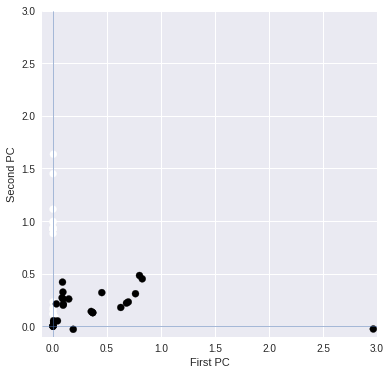

In [22]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=corpus['book_numerical'])

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,3)
plt.ylim(-.1,3)

(-0.1, 3)

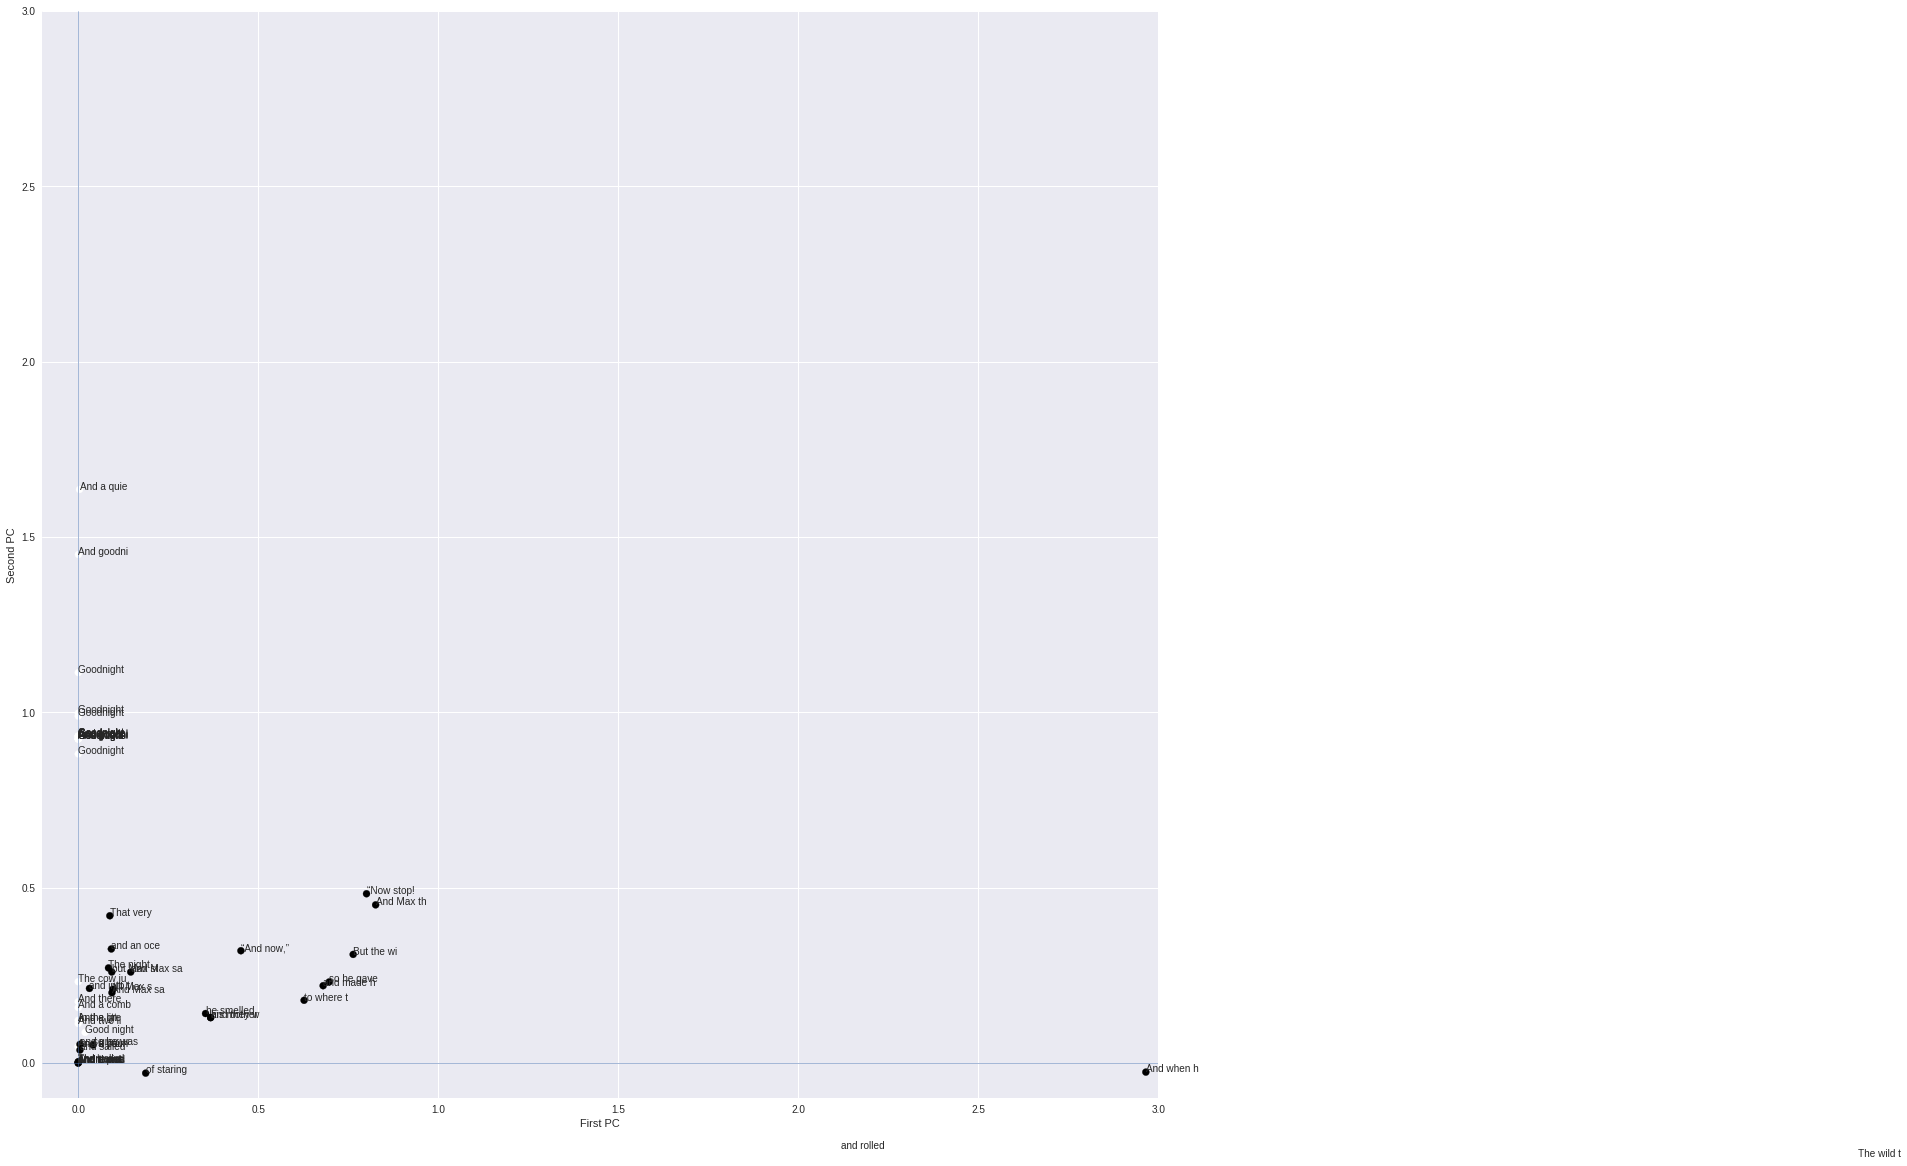

In [23]:
plt.figure(figsize=(20, 20))

plt.scatter(pc_1, pc_2, c=corpus['book_numerical'])

strings = corpus['text'].values
for i, (x, y) in enumerate(zip(pc_1, pc_2)): 
    plt.text(x,y,strings[i][:10])
    
plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,3)
plt.ylim(-.1,3)

In [25]:
tfidf_vectorizer = TfidfVectorizer(min_df = 1, stop_words = 'english')
document_term_matrix = create_document_term_matrix(tfidf_vectorizer, corpus['text'])
document_term_matrix.head()

,air,away,balloon,bears,bed,best,blinking,boat,bowl,brush,...,waved,weeks,whispering,wild,wolf,wore,world,year,yellow,young
text,,,,,,,,,,,,,,,,,,,,,
In the great green room,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
There was a telephone,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And a red balloon,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And a picture of-,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The cow jumping over the moon,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
latent_semantic_analysis, vocabulary_expression = perform_latent_semantic_analysis(2, tfidf_vectorizer)
latent_semantic_analysis['text'] = corpus['text']
latent_semantic_analysis['book'] = corpus['book']

In [27]:
vocabulary_expression.abs().T.sort_values('component_1', ascending=False).head(10)

,component_1,component_2
goodnight,0.901280,0.001510
moon,0.164067,0.000543
kittens,0.113230,0.000122
comb,0.105750,0.000364
brush,0.105736,0.000250
mush,0.105731,0.000278
bears,0.105258,0.001427
chairs,0.105205,0.001473
mittens,0.098883,0.000354
mouse,0.098642,0.000210


In [28]:
vocabulary_expression.abs().T.sort_values('component_2', ascending=False).head(10)

,component_1,component_2
wild,0.000296,0.551198
things,0.000202,0.533336
king,0.000021,0.298761
max,0.000843,0.269045
said,0.000259,0.219351
terrible,0.000043,0.187702
eat,0.000009,0.139538
gave,0.000012,0.116611
ll,0.000023,0.099650
thing,0.000210,0.091641


(-0.1, 1)

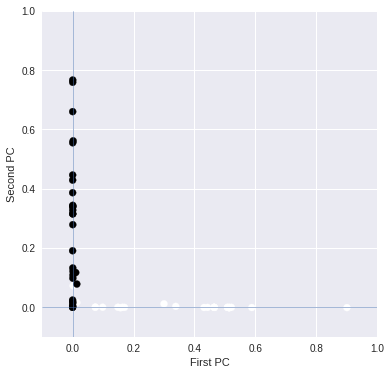

In [30]:
plt.figure(figsize=(6,6))
pc_1 = latent_semantic_analysis['component_1'].values
pc_2 = latent_semantic_analysis['component_2'].values

plt.scatter(pc_1, pc_2, c=corpus['book_numerical'])

plt.xlabel('First PC')
plt.ylabel('Second PC')
plt.axvline(linewidth=0.5)
plt.axhline(linewidth=0.5)
plt.xlim(-.1,1)
plt.ylim(-.1,1)

In [31]:
latent_semantic_analysis.head()

,component_1,component_2,text,book
0,0.013799,0.015191,In the great green room,Goodnight Moon
1,-0.000021,-0.000469,There was a telephone,Goodnight Moon
2,0.000054,-0.001090,And a red balloon,Goodnight Moon
3,-0.000061,0.000078,And a picture of-,Goodnight Moon
4,0.170398,-0.000663,The cow jumping over the moon,Goodnight Moon


In [32]:
latent_semantic_analysis['book'] = corpus['book']
latent_semantic_analysis[(latent_semantic_analysis['book'] == 'Goodnight Moon') 
                         & (latent_semantic_analysis['component_2'] > .01)]

,component_1,component_2,text,book
0,0.013799,0.015191,In the great green room,Goodnight Moon
11,0.300192,0.011195,And a quiet old lady who was whispering “hush”...,Goodnight Moon
31,0.001443,0.072081,Good night noises everywhere,Goodnight Moon


In [33]:

latent_semantic_analysis[(latent_semantic_analysis['book'] == 'Where the Wild Things Are') 
                         & (latent_semantic_analysis['component_1'] > .01)]

,component_1,component_2,text,book
36,0.010189,0.116732,That very night in Max’s room a forest grew an...,Where the Wild Things Are
59,0.013749,0.077923,and into the night of his very own room where ...,Where the Wild Things Are


In [34]:
document_term_matrix.head()

,air,away,balloon,bears,bed,best,blinking,boat,bowl,brush,...,waved,weeks,whispering,wild,wolf,wore,world,year,yellow,young
text,,,,,,,,,,,,,,,,,,,,,
In the great green room,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
There was a telephone,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And a red balloon,0.0,0.0,0.707107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
And a picture of-,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
The cow jumping over the moon,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
dtm_corr = document_term_matrix.corr()
dtm_corr.head()

,air,away,balloon,bears,bed,best,blinking,boat,bowl,brush,...,waved,weeks,whispering,wild,wolf,wore,world,year,yellow,young
air,1.000000,-0.016667,-0.023769,-0.022886,-0.023426,-0.016667,-0.016667,-0.023764,-0.016667,-0.022803,...,-0.016667,-0.023415,-0.023660,-0.054440,-0.016667,-0.016667,-0.023415,-0.023415,-0.016667,-0.016667
away,-0.016667,1.000000,-0.023769,-0.022886,-0.023426,-0.016667,-0.016667,-0.023764,-0.016667,-0.022803,...,-0.016667,-0.023415,-0.023660,-0.054440,-0.016667,-0.016667,0.813289,-0.023415,-0.016667,-0.016667
balloon,-0.023769,-0.023769,1.000000,-0.032638,-0.033409,-0.023769,-0.023769,-0.033891,-0.023769,-0.032521,...,-0.023769,-0.033394,-0.033743,-0.077640,-0.023769,-0.023769,-0.033394,-0.033394,-0.023769,-0.023769
bears,-0.022886,-0.022886,-0.032638,1.000000,-0.032167,-0.022886,-0.022886,-0.032631,-0.022886,-0.031312,...,-0.022886,-0.032153,-0.032489,-0.074754,-0.022886,-0.022886,-0.032153,-0.032153,-0.022886,-0.022886
bed,-0.023426,-0.023426,-0.033409,-0.032167,1.000000,-0.023426,-0.023426,-0.033401,-0.023426,-0.032051,...,-0.023426,-0.032912,-0.033255,0.063472,-0.023426,-0.023426,-0.032912,-0.032912,-0.023426,-0.023426


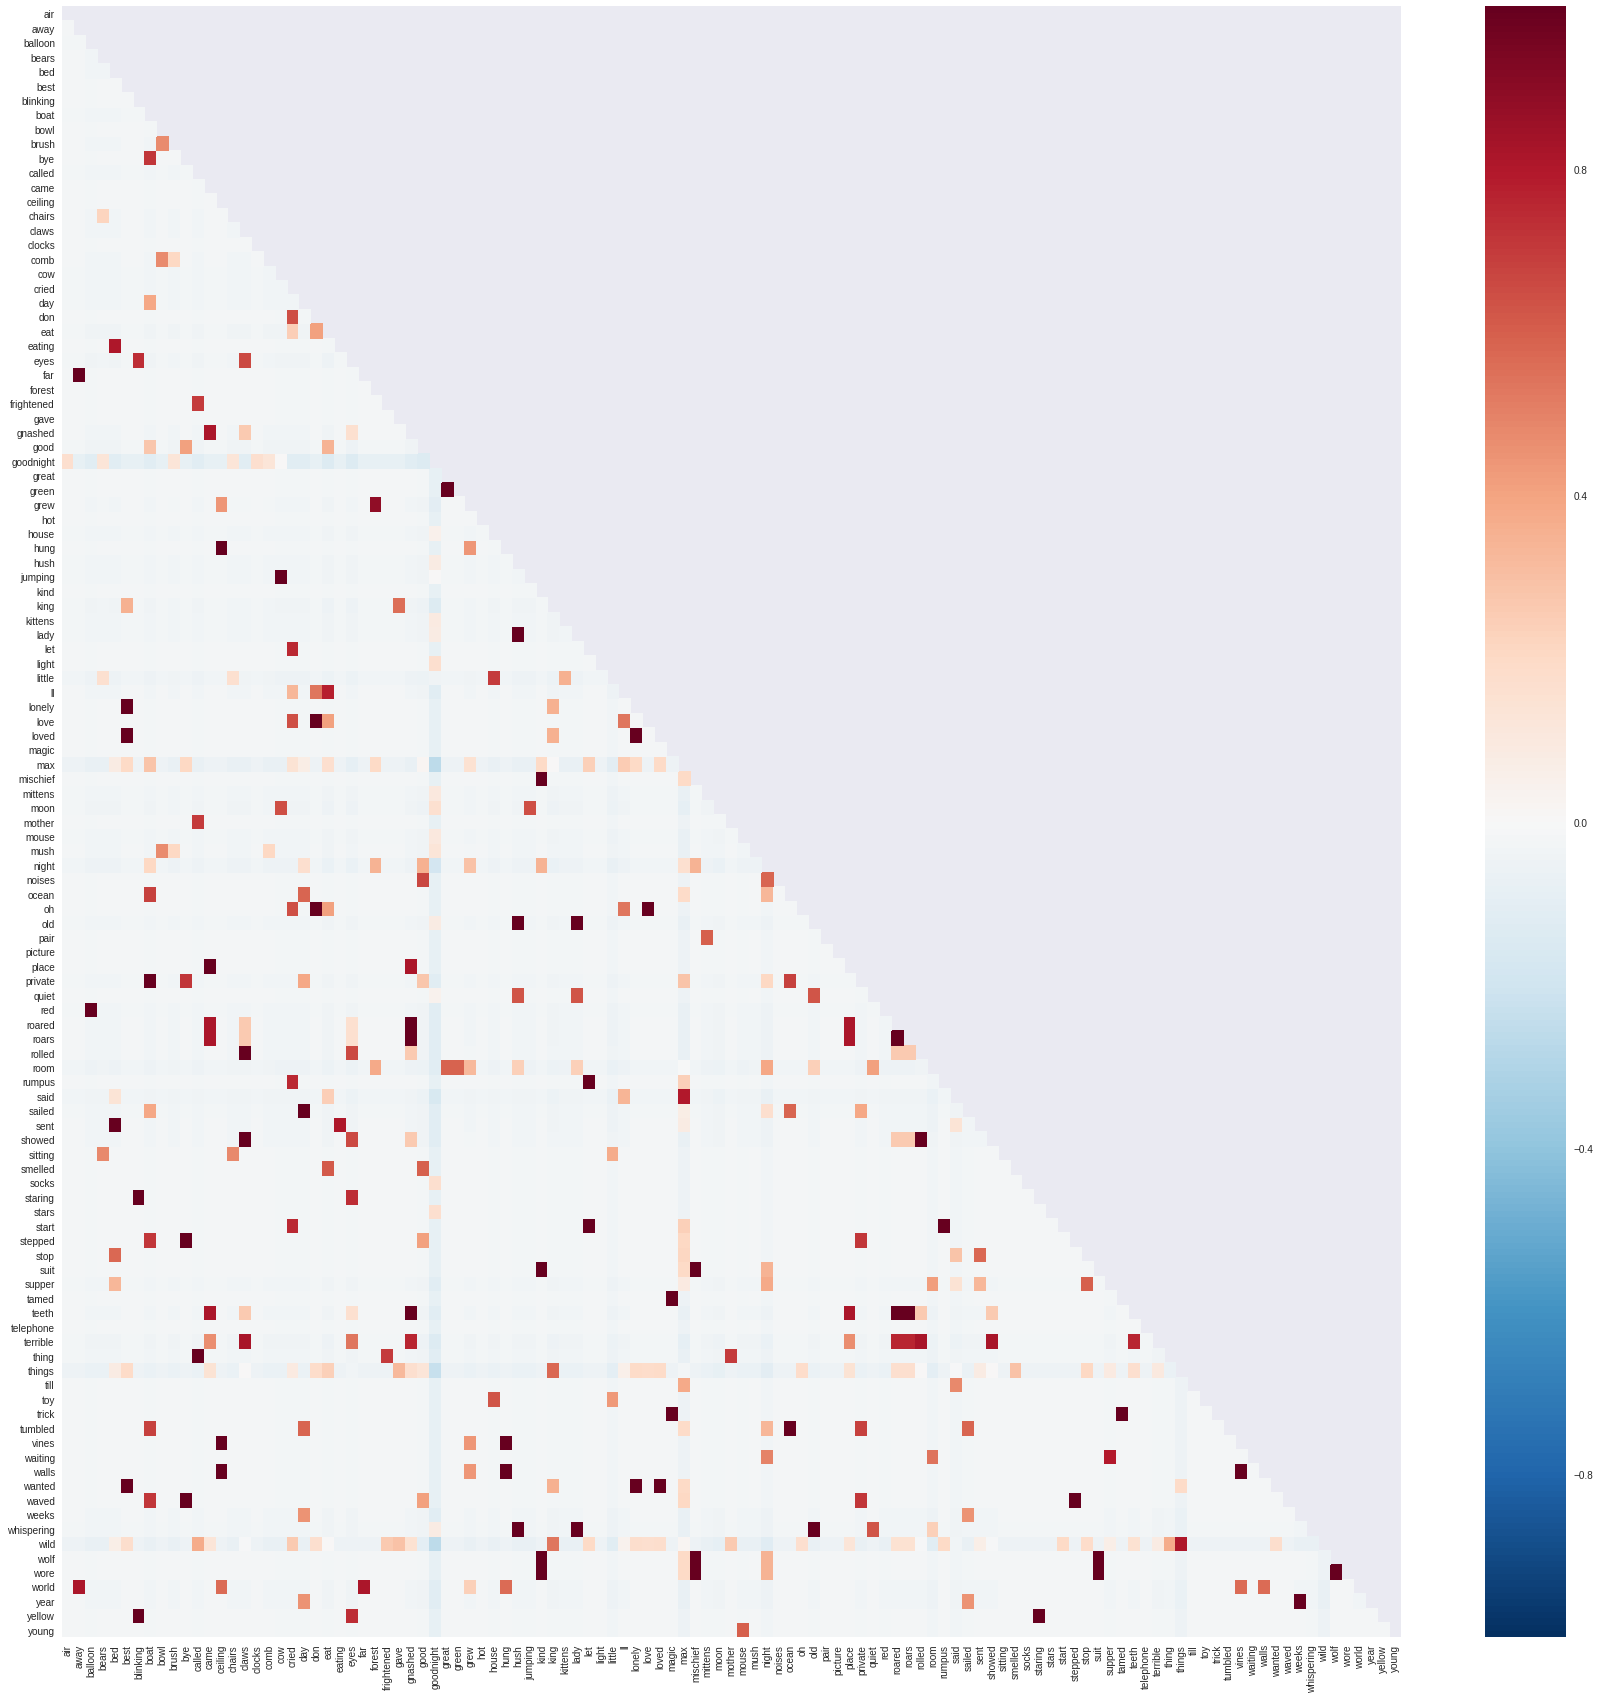

In [36]:
mask = np.zeros_like(dtm_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure(figsize=(30,30))
sns.heatmap(dtm_corr, mask=mask)